In [1]:
%matplotlib inline
!pip install deeptrack

<!--<badge>--><a href="https://colab.research.google.com/github/softmatterlab/DeepTrack-2.0/blob/develop/examples/LodeSTAR/03.track_BF-C2DL-HSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

(-0.5, 39.5, 39.5, -0.5)

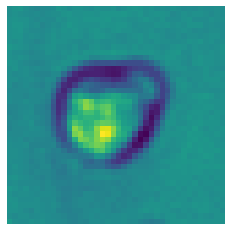

In [3]:
t, x, y, w = (251, 80, 538, 40)
training_image = dt.LoadImage(f"data/BF-C2DL-HSC/t{t:04d}.tif")()._value / 256
crop = training_image[y:y+w, x:x+w]
plt.imshow(crop)
plt.axis("off")


In [4]:

model = dt.models.LodeSTAR(input_shape=(None, None, 1))

train_set =   (
    dt.Value(crop)
    >> dt.Add(lambda: np.random.randn() * 0.1)
    >> dt.Gaussian(sigma=lambda:np.random.uniform(0, 0.2))  
    >> dt.Multiply(lambda: np.random.uniform(0.6, 1.2))
)
# model.model.consistency_weight = X
model.fit(
    train_set,
    epochs=30,
    batch_size=8,
)



Generating 166 / 160 samples before starting training
Epoch 1/30
166/166 [==============================] - 6s 8ms/step - total_loss: 3.0262 - consistency_loss: 1.5329
Epoch 2/30
166/166 [==============================] - 2s 12ms/step - total_loss: 2.9959 - consistency_loss: 1.5182
Epoch 3/30
166/166 [==============================] - 2s 11ms/step - total_loss: 2.5581 - consistency_loss: 1.3141
Epoch 4/30
166/166 [==============================] - 2s 11ms/step - total_loss: 1.4876 - consistency_loss: 0.8474
Epoch 5/30
166/166 [==============================] - 2s 11ms/step - total_loss: 1.1057 - consistency_loss: 0.6666
Epoch 6/30
166/166 [==============================] - 2s 12ms/step - total_loss: 0.3783 - consistency_loss: 0.1543
Epoch 7/30
166/166 [==============================] - 2s 11ms/step - total_loss: 0.1069 - consistency_loss: 0.0277
Epoch 8/30
166/166 [==============================] - 2s 12ms/step - total_loss: 0.0966 - consistency_loss: 0.0230
Epoch 9/30
166/166 [=======

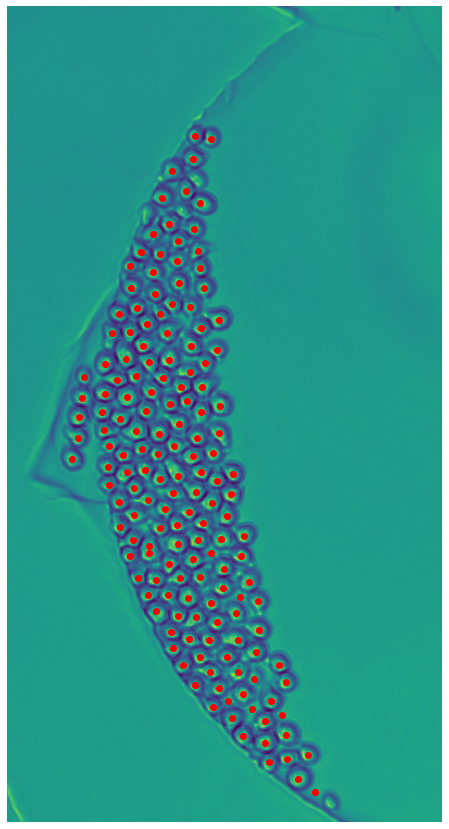

In [5]:
#May need to tune these to get optimal performance!
alpha = 0.2
cutoff = 0.99

frame_index = 1763

image = dt.LoadImage(f"data/BF-C2DL-HSC/t{frame_index:04d}.tif")()._value / 256
image = image[130:-130, :400]

detections = model.predict_and_detect(image[np.newaxis], alpha=alpha, beta=1-alpha, cutoff=cutoff, mode="quantile")[0]
# detections = autotracker.detect(pred[0], weights[0], beta=1-alpha, alpha=alpha, cutoff=cutoff, mode="constant")

plt.figure(figsize=(15, 15))
plt.imshow(image)
plt.axis("off")
plt.scatter(detections[:, 1], detections[:, 0], color="r")